<a href="https://colab.research.google.com/github/Shubhu2603/DeepLearning/blob/main/SigmoidNeuron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Plotting Sigmoid Function

In [94]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, mean_squared_error
from tqdm.notebook import tqdm

$S_{w,b}(x)=\frac{1}{1+e^{-(wx+b)}}$

In [2]:
def sigmoid(x,w,b):
  return 1/(1+np.exp(-(w*x+b)))

In [3]:
print(sigmoid(1,0.5,1))

0.8175744761936437


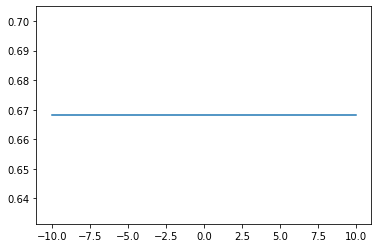

In [4]:
w=0 #@param {type: "slider", min: -2, max: 2, step:0.1}
b=0.7 #@param {type: "slider", min: -2, max: 2, step:0.1}
X=np.linspace(-10,10,100)
for i in range(10):
  Y=sigmoid(X,w,b)

plt.plot(X,Y)
plt.show()
#Calling the function for every value in array

$S_{w_1,w_2,b}{x_1,x_2}(x)=\frac{1}{1+e^{-(w_1x_1+w_2x_2+b)}}$

In [5]:
def sigmoid_2d(x1,x2,w1,w2,b):
  return 1/(1+np.exp(-(w1*x1+w2*x2+b)))

In [6]:
sigmoid_2d(1,0,0,0.5,1)

0.7310585786300049

In [7]:
from mpl_toolkits import mplot3d

In [8]:
X1=np.linspace(-10,10,100)
X2=np.linspace(-10,10,100)

XX1, XX2=np.meshgrid(X1,X2)
print(X1.shape,X2.shape,XX1.shape,XX2.shape)

(100,) (100,) (100, 100) (100, 100)


In [9]:
w1=2
w2=0.5
b=0
Y=sigmoid_2d(XX1,XX2,w1,w2,b)

In [10]:
import matplotlib.colors
cmap=matplotlib.colors.LinearSegmentedColormap.from_list("",["red","violet","blue"])

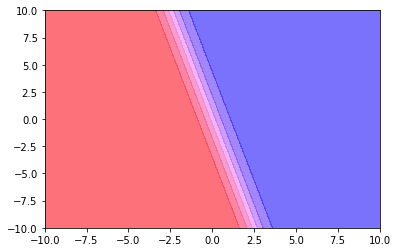

In [11]:
plt.contourf(XX1,XX2,Y,cmap=cmap,alpha=0.6)
plt.show()

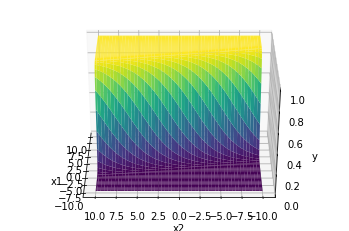

In [12]:
fig=plt.figure()
ax=plt.axes(projection='3d')
ax.plot_surface(XX1,XX2,Y,cmap='viridis')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y');
ax.view_init(30,180)

#Computing Loss function for given dataset

In [13]:
w_unknown=0.5
b_unknown=0.25

X= np.random.random(25)*20-10 
Y= sigmoid(X,w_unknown,b_unknown)

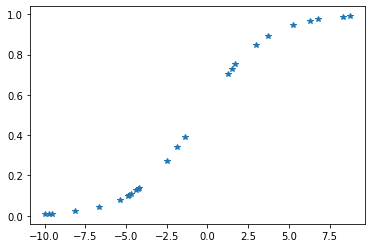

In [14]:
plt.plot(X,Y,'*')
plt.show()

In [15]:
def calculate_loss(X, Y, w_est, b_est):
  loss=0
  for x,y in zip(X,Y):
    loss+=(y-sigmoid(x,w_est,b_est))**2
  return loss

In [16]:
W=np.linspace(0,2,100)
B=np.linspace(0,2,100)

WW, BB=np.meshgrid(W,B)

Loss1=np.zeros(WW.shape)

In [17]:
WW.shape

(100, 100)

In [18]:
for i in range(WW.shape[0]):
  for j in range(WW.shape[1]):
    Loss1[i,j]= calculate_loss(X,Y,WW[i,j],BB[i,j])

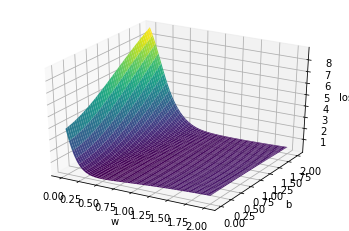

In [19]:
fig=plt.figure()
ax=plt.axes(projection='3d')
ax.plot_surface(WW,BB,Loss1,cmap='viridis')
ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('loss');
#ax.view_init(30,180)

In [20]:
ij=np.argmin(Loss1)
i=int(np.floor(ij/Loss1.shape[1]))
j=int(ij-i*Loss1.shape[1])

In [21]:
print(i,j)

13 25


In [22]:
print(WW[i,j],BB[i,j])

0.5050505050505051 0.26262626262626265


# Class for Sigmoid Neuron

In [95]:
class SigmoidNeuron:

  def __init__(self):
    self.w=None
    self.b=None
  
  def perceptron(self,x):
    return np.dot(x,self.w.T)+self.b
  
  def sigmoid(self,x):
    return 1.0/(1.0+np.exp(-x))
  
  def grad_w(self,x,y):
    y_pred=self.sigmoid(self.perceptron(x))
    return (y_pred-y)*y_pred*(1-y_pred)*x

  def grad_b(self,x,y):
    y_pred=self.sigmoid(self.perceptron(x))
    return (y_pred-y)*y_pred*(1-y_pred)

  def fit(self,X,Y,epochs=1,learning_rate=1,initialise=True,display_loss=False):
    if initialise:
      self.w=np.random.randn(1,X.shape[1])
      self.b=0
    
    if display_loss:
      loss={}

    for i in tqdm(range(epochs),total=epochs,unit='Epoch'):
      dw=0
      db=0
      for x,y in zip(X,Y):
        dw+=self.grad_w(x,y)
        db+=self.grad_b(x,y)
      self.w-=learning_rate*dw
      self.b-=learning_rate*db

      if display_loss:
        Y_pred=self.sigmoid(self.perceptron(X))
        loss[i]=mean_squared_error(Y_pred,Y)
    
    if display_loss:
      plt.plot(np.array(list(loss.values())).astype(float))
      plt.xlabel('Epohs')
      plt.ylabel('Mean Squared Error')
      plt.show()

  def predict(self,X):
    Y_pred=[]
    for x in X:
      y_pred=self.sigmoid(self.perceptron(x))
      Y_pred.append(y_pred)
    return np.asarray(Y_pred)

#Fit for toy data

In [24]:
X=np.asarray([[2.5,2.5],[4,-1],[1,-4],[-3,1.25],[-2,-4],[1,5]])
Y=[1,1,1,0,0,0]

In [25]:
sn=SigmoidNeuron()
sn.fit(X,Y,1,0.25,True)

In [26]:
def plot_sn(X,Y,sn,ax):
  X1=np.linspace(-10,10,100)
  X2=np.linspace(-10,10,100)
  XX1, XX2=np.meshgrid(X1,X2)
  YY=np.zeros(XX1.shape)
  for i in range(X2.size):
    for j in range(X1.size):
      val=np.asarray([X1[j],X2[i]])
      YY[i,j]=sn.sigmoid(sn.perceptron(val))
  ax.contourf(XX1,XX2,YY,cmap=cmap,alpha=0.6)
  ax.scatter(X[:,0],X[:,1],c=Y,cmap=cmap)
  ax.plot()

[[ 0.25069395 -0.12568843]] [-0.00799226]
[[ 0.66983774 -0.19036836]] [-0.0384002]
[[ 0.78589317 -0.30249285]] [-0.09442622]
[[ 0.91699251 -0.25469402]] [-0.14346952]
[[ 0.97343004 -0.36816108]] [-0.19396747]
[[ 1.07444513 -0.31211758]] [-0.23504691]
[[ 1.11591595 -0.39825253]] [-0.27760196]
[[ 1.18911424 -0.37006789]] [-0.31242531]
[[ 1.23013508 -0.41513324]] [-0.34709085]
[[ 1.28175516 -0.41520574]] [-0.37726455]
[[ 1.32192534 -0.43553105]] [-0.40601651]
[[ 1.36199457 -0.44588968]] [-0.43233588]
[[ 1.39817602 -0.45840147]] [-0.45698791]
[[ 1.43221872 -0.46927264]] [-0.47999444]
[[ 1.46405027 -0.47963026]] [-0.501574]
[[ 1.49399153 -0.489341  ]] [-0.52186407]
[[ 1.52223667 -0.49850453]] [-0.5409942]
[[ 1.54896163 -0.50717429]] [-0.5590756]
[[ 1.5743158  -0.51539912]] [-0.57620559]
[[ 1.59842807 -0.52322095]] [-0.59246948]
[[ 1.62141026 -0.53067617]] [-0.60794235]
[[ 1.64336003 -0.53779652]] [-0.62269055]
[[ 1.66436313 -0.54460991]] [-0.6367729]
[[ 1.68449525 -0.55114093]] [-0.65024173

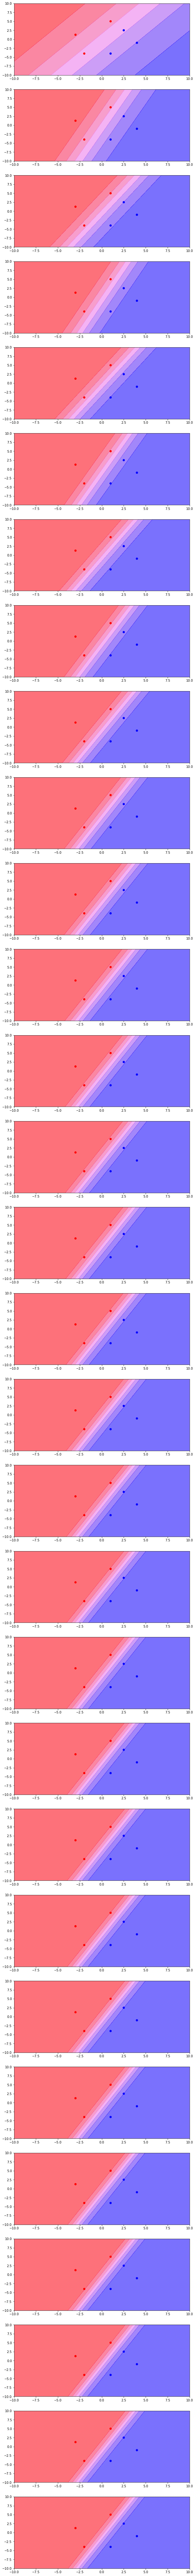

In [27]:
sn.fit(X,Y,1,0.5,True)
N=30
plt.figure(figsize=(10,N*5))
for i in range(N):
  print(sn.w,sn.b)
  ax=plt.subplot(N,1,i+1)
  plot_sn(X,Y,sn,ax)
  sn.fit(X,Y,1,0.5,False) 

#Load Data

In [30]:
!ls 

mobile_cleaned.csv  sample_data


In [31]:
data=pd.read_csv('mobile_cleaned.csv')

In [32]:
data.head()

,PhoneId,Pixel Density,Screen Size,Weight,RAM,Processor_frequency,Screen to Body Ratio (calculated),Height,Internal Memory,Capacity,...,os_name_Tizen,os_name_iOS,"SIM Slot(s)_Dual SIM, GSM+CDMA","SIM Slot(s)_Dual SIM, GSM+GSM","SIM Slot(s)_Dual SIM, GSM+GSM, Dual VoLTE","SIM Slot(s)_Single SIM, GSM",Sim1_2G,Sim1_3G,Sim1_4G,Rating
0,0,403,6.26,182,4,1.8,80.68,157.9,64,4000,...,0,0,0,0,1,0,0,0,1,4.5
1,1,271,6.20,168,3,1.8,80.85,156.2,32,4230,...,0,0,0,0,1,0,0,0,1,4.5
2,2,409,6.30,168,3,2.1,83.68,157.0,32,3500,...,0,0,0,0,1,0,0,0,1,4.4
3,4,411,6.00,169,4,2.2,74.78,159.8,64,3300,...,0,0,0,1,0,0,0,0,1,4.3
4,5,396,6.50,175,4,2.2,84.23,160.4,64,3750,...,0,0,0,0,1,0,0,0,1,4.4


In [33]:
data.shape

(341, 88)

In [34]:
X=data.drop("Rating",axis=1)
Y=data['Rating'].values

In [35]:
X.head()

,PhoneId,Pixel Density,Screen Size,Weight,RAM,Processor_frequency,Screen to Body Ratio (calculated),Height,Internal Memory,Capacity,...,os_name_Other,os_name_Tizen,os_name_iOS,"SIM Slot(s)_Dual SIM, GSM+CDMA","SIM Slot(s)_Dual SIM, GSM+GSM","SIM Slot(s)_Dual SIM, GSM+GSM, Dual VoLTE","SIM Slot(s)_Single SIM, GSM",Sim1_2G,Sim1_3G,Sim1_4G
0,0,403,6.26,182,4,1.8,80.68,157.9,64,4000,...,0,0,0,0,0,1,0,0,0,1
1,1,271,6.20,168,3,1.8,80.85,156.2,32,4230,...,0,0,0,0,0,1,0,0,0,1
2,2,409,6.30,168,3,2.1,83.68,157.0,32,3500,...,0,0,0,0,0,1,0,0,0,1
3,4,411,6.00,169,4,2.2,74.78,159.8,64,3300,...,0,0,0,0,1,0,0,0,0,1
4,5,396,6.50,175,4,2.2,84.23,160.4,64,3750,...,0,0,0,0,0,1,0,0,0,1


In [36]:
Y

array([4.5, 4.5, 4.4, 4.3, 4.4, 4.5, 4.3, 4.1, 4.3, 4.5, 4.5, 4. , 4.4,
       4.4, 4.4, 4.4, 4.5, 4.4, 4.4, 4.4, 4.4, 4.5, 4.4, 4.3, 4.2, 4.3,
       4.3, 4.6, 4.4, 4.5, 3.9, 4.2, 4.3, 4.2, 4.3, 4.3, 4.2, 4.4, 4.1,
       3.8, 4.4, 4.6, 4.3, 4.5, 4.5, 4.2, 3.9, 4.3, 4. , 4.3, 4.3, 3.9,
       4.2, 4.5, 4. , 4.6, 4.2, 2.8, 4.4, 4.3, 4.2, 4.4, 4.4, 4. , 4.4,
       4.4, 4.1, 4.5, 4.3, 3.9, 4.3, 4.1, 4.1, 4.2, 3.4, 4.2, 4.6, 3.8,
       4.3, 4.5, 4.2, 4.5, 4.5, 4. , 4.1, 4.4, 4.5, 4.1, 4.5, 4.3, 4.5,
       3.9, 3.9, 4.4, 4.4, 4.4, 4. , 4.1, 4.1, 4.4, 4.3, 4.3, 4.2, 4.3,
       3.4, 4.3, 4.3, 4.2, 4.6, 4.8, 4.4, 3.4, 3.7, 4.2, 4.3, 4.4, 4.3,
       4.2, 4.1, 4.3, 4. , 3.9, 4.4, 4.4, 3.9, 3.1, 3.7, 4.2, 4.4, 4. ,
       4. , 4.1, 4.2, 4.3, 4.2, 4.3, 4.1, 3.6, 4.1, 4. , 3.8, 3.7, 4.3,
       4.1, 4.1, 4.5, 4. , 4.3, 3.6, 4.1, 4.5, 3.5, 4. , 4.3, 4.6, 3.5,
       3.9, 4.1, 3.9, 3.8, 4.4, 4.3, 4. , 3.9, 4.4, 4.7, 3.9, 4.5, 3.7,
       4. , 4.3, 4.1, 4.8, 4.1, 4. , 4.7, 4. , 4.1, 4. , 3.4, 4.

In [37]:
threshold=4.2
data['Class']=(data['Rating']>=threshold).astype(np.int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


In [38]:
data

,PhoneId,Pixel Density,Screen Size,Weight,RAM,Processor_frequency,Screen to Body Ratio (calculated),Height,Internal Memory,Capacity,...,os_name_iOS,"SIM Slot(s)_Dual SIM, GSM+CDMA","SIM Slot(s)_Dual SIM, GSM+GSM","SIM Slot(s)_Dual SIM, GSM+GSM, Dual VoLTE","SIM Slot(s)_Single SIM, GSM",Sim1_2G,Sim1_3G,Sim1_4G,Rating,Class
0,0,403,6.26,182,4,1.8,80.68,157.9,64,4000,...,0,0,0,1,0,0,0,1,4.5,1
1,1,271,6.20,168,3,1.8,80.85,156.2,32,4230,...,0,0,0,1,0,0,0,1,4.5,1
2,2,409,6.30,168,3,2.1,83.68,157.0,32,3500,...,0,0,0,1,0,0,0,1,4.4,1
3,4,411,6.00,169,4,2.2,74.78,159.8,64,3300,...,0,0,1,0,0,0,0,1,4.3,1
4,5,396,6.50,175,4,2.2,84.23,160.4,64,3750,...,0,0,0,1,0,0,0,1,4.4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336,465,220,5.00,141,1,1.2,67.20,142.7,16,2420,...,0,0,1,0,0,0,0,1,3.8,0
337,466,401,5.50,165,4,1.8,69.95,156.5,64,3000,...,0,0,1,0,0,0,0,1,3.9,0
338,468,282,5.20,160,3,1.4,68.52,149.7,16,3000,...,0,0,1,0,0,0,0,1,4.1,0
339,470,218,4.50,156,1,1.3,63.93,132.0,8,1800,...,0,0,1,0,0,0,0,1,3.6,0


In [39]:
data['Class'].value_counts(normalize=True)

0    0.533724
1    0.466276
Name: Class, dtype: float64

In [40]:
Y_binarised=data['Class'].values

##Standardisation

In [41]:
from sklearn.preprocessing import StandardScaler

In [42]:
R=np.random.random([100,1])

In [43]:
R.mean()

0.488550606394798

<function matplotlib.pyplot.show>

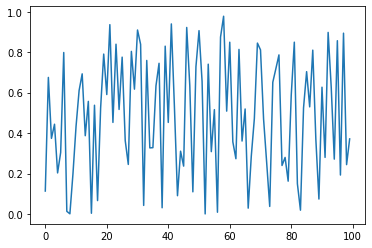

In [44]:
plt.plot(R)
plt.show

In [45]:
np.std(R)

0.28672131596764483

In [46]:
scaler=StandardScaler()

In [47]:
scaler.fit(R)

StandardScaler()

In [48]:
scaler.mean_

array([0.48855061])

In [49]:
RT=scaler.transform(R)

In [50]:
RT.std()

1.0

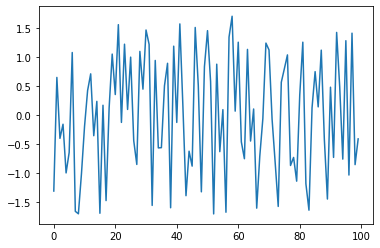

In [51]:
plt.plot(RT)
plt.show()

In [52]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=0,stratify=Y_binarised)

In [53]:
print(X_train.shape,X_test.shape)

(255, 87) (86, 87)


In [54]:
scaler=StandardScaler()

In [55]:
X_scaled_train=scaler.fit_transform(X_train)
X_scaled_test=scaler.transform(X_test)

In [56]:
minmax_scaler=MinMaxScaler()

In [57]:
Y_scaled_train=minmax_scaler.fit_transform(Y_train.reshape(-1,1))
Y_scaled_test=minmax_scaler.transform(Y_test.reshape(-1,1))

In [58]:
np.max(Y_scaled_train)

1.0

In [59]:
scaled_threshold=list(minmax_scaler.transform(np.asarray([threshold]).reshape(1,-1)))[0][0]

In [60]:
scaled_threshold 

0.6800000000000002

In [61]:
Y_binarised_train=(Y_scaled_train>scaled_threshold).astype('int').ravel()
Y_binarised_test=(Y_scaled_test>scaled_threshold).astype('int').ravel()

In [62]:
Y_binarised_train

array([0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1])

#Train on Real Data

In [96]:
sn=SigmoidNeuron()

  0%|          | 0/2000 [00:00<?, ?Epoch/s]

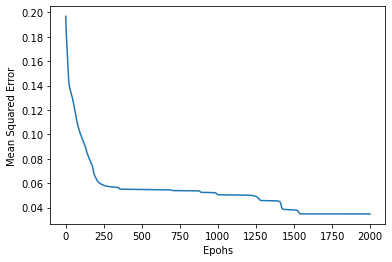

In [97]:
sn.fit(X_scaled_train,Y_scaled_train,epochs=2000,learning_rate=0.015,display_loss=True)

In [65]:
Y_pred_train=sn.predict(X_scaled_train)
Y_pred_test=sn.predict(X_scaled_test)

In [66]:
Y_pred_binarised_train=(Y_pred_train>scaled_threshold).astype("int").ravel()
Y_pred_binarised_test=(Y_pred_test>scaled_threshold).astype("int").ravel()

In [67]:
accuracy_train=accuracy_score(Y_pred_binarised_train,Y_binarised_train)
print(accuracy_train)

0.7803921568627451


In [68]:
accuracy_test=accuracy_score(Y_pred_binarised_test,Y_binarised_test)
print(accuracy_test)

0.7209302325581395
